Originally, I'm testing kmeans algorithm. The dataset I used here are raw text so we need to do some processing first. The function used to load and parse this dataset is in another file called health_news_parser which contains two function to load the data for testing for kmeans and also decision tree model. Since the raw data is text, we need to apply the TDIF feature extractor to convert words into frequency which is a numerical data that can be consumed by the ML algorithms. Since the number of features is high ~ 30000 ish, and the data is very sparse which is around ~ 0.99, it is impossible to visualize how each feature affect the hypothesis at this point. We will now skip to the analysis part after applying dimensionality reduction and collecting the result. The results load into this notebook are output from code in another file.

We will explore the importance of each features later after training the decision tree.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from health_news_parser import load_health_news_for_decision_tree
import os

In [2]:
path = "../output/decision_tree/"
df_each = []
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f) and ("2" in f or "5" in f):
        temp = pd.read_csv(f)
        temp = temp[temp.name.apply(lambda x: x != "name")]
        df_each.append((temp, filename))

Metrics for scoring dimensionality reduction results. Can choose to give different eight to reduction time, accuracy and trainnig time.

In [3]:
def score(reduc_time, accuracy, train_time, red_w = 200, ac_w = 1, train_w = 20):
    return (accuracy ** ac_w)*(red_w/int(reduc_time + 1) + train_w/int(train_time + 1))

In [4]:
red_w = 10
ac_w = 10
train_w = 10
included_cols = ["name", "filename", "original_shape", "transformed_shape", "params", "reduction_time", "accuracy", "train_time", "score_series"]

In [5]:
out_df = pd.DataFrame(columns=included_cols)
collected_all_df = pd.DataFrame(columns=included_cols)
for res in df_each:
    res_copy = res[0].copy()
    res_copy["filename"] = res[1]
    score_series = res_copy[res_copy.name != "Nothing"][["reduction_time", "train_time", "accuracy"]].apply(lambda x: score(x["reduction_time"], x["accuracy"], red_w, ac_w, train_w), axis=1)
    res_copy_score = res_copy.copy()
    res_copy_score["score_series"] = score_series
    out_df = pd.concat([out_df, res_copy_score])
    max_ind = res_copy_score.groupby(by=["original_shape"])["score_series"].idxmax()
    collected = res_copy_score.iloc[max_ind][["name", "filename", "original_shape", "transformed_shape", "params", "reduction_time", "accuracy", "train_time", "score_series"]]
    collected_all_df = pd.concat([collected_all_df, collected])

These are the results of each dimensionality algorithm. One of the columns is the column for descrbing accuracy. As we can see here, for the decision tree model, the sparse JL transform performs the best.

In [6]:
all = out_df.groupby(by="filename", group_keys=True).apply(lambda x: x[:])
all[["name", "original_shape", "transformed_shape", "params", "reduction_time", "accuracy", "train_time", "score_series"]]

name  original_shape transformed_shape  \
filename                                                                       
2        0   extremely sparse JL transform   (7521, 15826)      (7721, 4041)   
         1   extremely sparse JL transform   (7521, 15826)      (7721, 3907)   
         2   extremely sparse JL transform   (7521, 15826)      (7721, 2020)   
         3   extremely sparse JL transform   (7521, 15826)      (7721, 1953)   
         4   extremely sparse JL transform   (7521, 15826)       (7721, 404)   
         5   extremely sparse JL transform   (7521, 15826)       (7721, 390)   
         6   extremely sparse JL transform   (7521, 15826)       (7721, 224)   
         7   extremely sparse JL transform   (7521, 15826)       (7721, 217)   
         8             sparse JL transform   (7521, 15826)      (7721, 1582)   
         9             sparse JL transform   (7521, 15826)      (7721, 1582)   
         10            sparse JL transform   (7521, 15826)      (7721, 7189)   
         11            sparse JL transform   (7521, 15826)      (7721, 5526)   
         12            sparse JL transform   (7521, 15826)       (7721, 287)   
         13            sparse JL transform   (7521, 15826)       (7721, 221)   
         14            sparse JL transform   (7521, 15826)        (7721, 88)   
         15            sparse JL transform   (7521, 15826)        (7721, 68)   
         16                   JL transform   (7521, 15826)      (7721, 1582)   
         17                   JL transform   (7521, 15826)      (7721, 1582)   
         18                   JL transform   (7521, 15826)      (7721, 7189)   
         19                   JL transform   (7521, 15826)      (7721, 5526)   
         20                   JL transform   (7521, 15826)       (7721, 287)   
         21                   JL transform   (7521, 15826)       (7721, 221)   
         22                   JL transform   (7521, 15826)        (7721, 88)   
         23                   JL transform   (7521, 15826)        (7721, 68)   
         24                            PCA   (7521, 15826)        (7721, 77)   
         25                        Nothing   (7521, 15826)     (7721, 15826)   
5        0   extremely sparse JL transform  (18920, 34042)     (19420, 4746)   
         1   extremely sparse JL transform  (18920, 34042)     (19420, 4602)   
         2   extremely sparse JL transform  (18920, 34042)     (19420, 2373)   
         3   extremely sparse JL transform  (18920, 34042)     (19420, 2301)   
         4   extremely sparse JL transform  (18920, 34042)      (19420, 474)   
         5   extremely sparse JL transform  (18920, 34042)      (19420, 460)   
         6   extremely sparse JL transform  (18920, 34042)      (19420, 263)   
         7   extremely sparse JL transform  (18920, 34042)      (19420, 255)   
         8             sparse JL transform  (18920, 34042)    (19420, 28759)   
         9             sparse JL transform  (18920, 34042)    (19420, 22104)   
         10            sparse JL transform  (18920, 34042)     (19420, 7189)   
         11            sparse JL transform  (18920, 34042)     (19420, 5526)   
         12            sparse JL transform  (18920, 34042)      (19420, 287)   
         13            sparse JL transform  (18920, 34042)      (19420, 221)   
         14            sparse JL transform  (18920, 34042)       (19420, 88)   
         15            sparse JL transform  (18920, 34042)       (19420, 68)   
         16                   JL transform  (18920, 34042)    (19420, 28759)   
         17                   JL transform  (18920, 34042)    (19420, 22104)   
         18                   JL transform  (18920, 34042)     (19420, 7189)   
         19                   JL transform  (18920, 34042)     (19420, 5526)   
         20                   JL transform  (18920, 34042)      (19420, 287)   
         21                   JL transform  (18920, 34042)      (19420, 221)   
         22                   JL trans

In [7]:
collected_all_df.groupby(["filename", "name"]).count().sort_values(by="original_shape").groupby(level=0).tail(1).sort_values(by="filename")

,,original_shape,transformed_shape,params,reduction_time,accuracy,train_time,score_series
filename,name,,,,,,,
2,extremely sparse JL transform,1,1,1,1,1,1,1
5,sparse JL transform,1,1,1,1,1,1,1


In [8]:
data, names = load_health_news_for_decision_tree(5, "../data/health+news+in+twitter/Health-Tweets/")
names

array(['00', '000', '0000', ..., 'zzukaz', 'zzzzz', 'zâ'], dtype=object)

In [9]:
X_train, X_test, y_train, y_test= data.training_data, data.testing_data, data.training_label, data.testing_label
rf = RandomForestClassifier()

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
importances = pd.Series(rf.feature_importances_, index=names)
std = np.std([importances for tree in rf.estimators_], axis=0)
importances

00         6.689091e-06
000        1.428233e-04
0000       3.327497e-07
000th      2.505835e-05
007        2.116010e-06
               ...     
zzgrrgf    1.850145e-07
zznvii     6.474405e-07
zzukaz     9.798430e-07
zzzzz      7.910921e-10
zâ         8.750825e-07
Length: 34042, dtype: float64

In [12]:
print(importances.sort_values(ascending=False).iloc[:10])

news    0.081064
in      0.066856
ws      0.055910
khne    0.050941
bit     0.040637
http    0.040252
to      0.033668
at      0.031416
ly      0.029917
com     0.028703
dtype: float64


These are the most important features (words) that can be used to classify each news site.

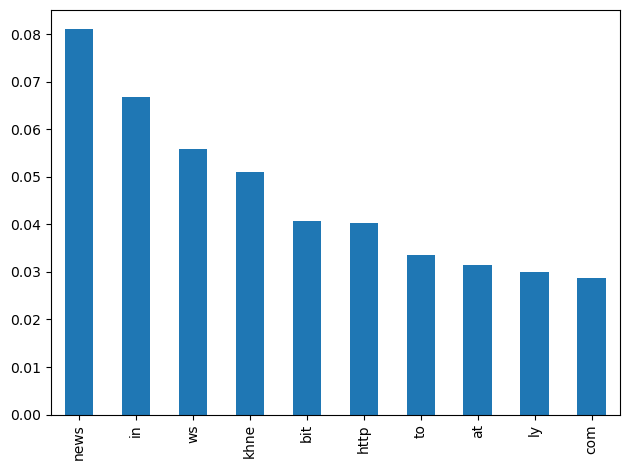

In [13]:
f_im = pd.Series(importances).sort_values(ascending=False).iloc[:10]

fig, ax = plt.subplots()
f_im.plot.bar(ax= ax)
fig.tight_layout()
plt.show()

Let's now compare the results from the decision tree to the kmeans clustering algorithm.

In [14]:
path = "../output/news/"
df_each = []
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        temp = pd.read_csv(f)
        temp = temp[temp.name.apply(lambda x: x != "name")]
        df_each.append((temp, filename))

In [15]:
out_df = pd.DataFrame(columns=included_cols)
collected_all_df = pd.DataFrame(columns=included_cols)
for res in df_each:
    res_copy = res[0].copy()
    res_copy["filename"] = res[1]
    score_series = res_copy[res_copy.name != "Nothing"][["reduction_time", "train_time", "accuracy"]].apply(lambda x: score(x["reduction_time"], x["accuracy"], red_w, ac_w, train_w), axis=1)
    res_copy_score = res_copy.copy()
    res_copy_score["score_series"] = score_series
    out_df = pd.concat([out_df, res_copy_score])
    max_ind = res_copy_score.groupby(by=["original_shape"])["score_series"].idxmax()
    collected = res_copy_score.iloc[max_ind][["name", "filename", "original_shape", "transformed_shape", "params", "reduction_time", "accuracy", "train_time", "score_series"]]
    collected_all_df = pd.concat([collected_all_df, collected])

In [16]:
all = out_df.groupby(by="filename", group_keys=True).apply(lambda x: x[:])
display(all[["name", "original_shape", "transformed_shape", "params", "reduction_time", "accuracy", "train_time", "score_series"]])

name  original_shape transformed_shape  \
filename                                                                       
2        0   extremely sparse JL transform   (6726, 16990)      (6928, 4029)   
         1   extremely sparse JL transform   (6726, 16990)      (6928, 3894)   
         2   extremely sparse JL transform   (6726, 16990)      (6928, 2014)   
         3   extremely sparse JL transform   (6726, 16990)      (6928, 1947)   
         4   extremely sparse JL transform   (6726, 16990)       (6928, 402)   
...                                    ...             ...               ...   
5        21                   JL transform  (23183, 40537)      (23688, 221)   
         22                   JL transform  (23183, 40537)       (23688, 88)   
         23                   JL transform  (23183, 40537)       (23688, 68)   
         24                            PCA  (23183, 40537)      (23688, 236)   
         25                        Nothing  (23183, 40537)    (23688, 40537)   

                                                  params  reduction_time  \
filename                                                                   
2        0                      {'ep': 0.05, 'de': 0.05}        0.437593   
         1                       {'ep': 0.05, 'de': 0.1}        0.423221   
         2                       {'ep': 0.1, 'de': 0.05}        0.408222   
         3                        {'ep': 0.1, 'de': 0.1}        0.411041   
         4                       {'ep': 0.5, 'de': 0.05}        0.408369   
...                                                  ...             ...   
5        21                       {'ep': 0.5, 'de': 0.1}        3.132158   
         22                      {'ep': 0.9, 'de': 0.05}        2.641303   
         23                       {'ep': 0.9, 'de': 0.1}        2.438814   
         24  {'n_components': 236, 'svd_solver': 'auto'}       60.950643   
         25                                           {}        0.000038   

             accuracy  train_time  score_series  
filename                                         
2        0      1.000    0.906473     11.818182  
         1      0.935    0.715884      6.034854  
         2      0.975    0.563305      9.174805  
         3      1.000    0.475363     11.818182  
         4      0.975    0.544050      9.174805  
...               ...         ...           ...  
5        21     0.358    0.581430      0.000149  
         22     0.318    0.536496      0.000054  
         23     0.306    0.541322      0.000037  
         24     0.690    0.578181      0.048486  
         25     0.622    7.140457           NaN  

[78 rows x 8 columns]

From the observation, kmeans tends to give better result compared to the decison tree. The overall accuracy is higher for all algorithms. For kmeans, these are the best corresponding best dimensionailty reduction algrithm in terms of both accuracy and running time.

In [17]:
collected_all_df.groupby(["filename", "name"]).count().sort_values(by="original_shape").groupby(level=0).tail(1).sort_values(by="filename")

,,original_shape,transformed_shape,params,reduction_time,accuracy,train_time,score_series
filename,name,,,,,,,
2,extremely sparse JL transform,1,1,1,1,1,1,1
3,extremely sparse JL transform,1,1,1,1,1,1,1
5,extremely sparse JL transform,1,1,1,1,1,1,1
